<a href="https://colab.research.google.com/github/Inconsequential-24/Mukta/blob/main/oral_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget /content/drive/MyDrive/oral_analysis_1/__MACOSX/oral_analysis_1

/content/drive/MyDrive/oral_analysis_1/__MACOSX/oral_analysis_1: Scheme missing.


In [ ]:
import os

# Walk through oral images directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/oral_analysis_1"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/content/drive/MyDrive/oral_analysis_1'.
There are 2 directories and 0 images in '/content/drive/MyDrive/oral_analysis_1/Test'.
There are 0 directories and 50 images in '/content/drive/MyDrive/oral_analysis_1/Test/Normal'.
There are 0 directories and 58 images in '/content/drive/MyDrive/oral_analysis_1/Test/Abnormal'.
There are 2 directories and 0 images in '/content/drive/MyDrive/oral_analysis_1/Train'.
There are 0 directories and 295 images in '/content/drive/MyDrive/oral_analysis_1/Train/Normal'.
There are 0 directories and 335 images in '/content/drive/MyDrive/oral_analysis_1/Train/Abnormal'.


In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/oral_analysis_1/Test")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories

print(class_names)

['Abnormal' 'Normal']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['images - 2024-05-19T225344.440.jpeg']
Image shape: (235, 215, 3)


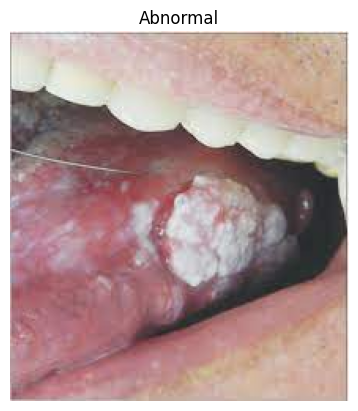

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/oral_analysis_1/Test/",
                        target_class="Abnormal")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(235, 215, 3), dtype=uint8, numpy=
array([[[252, 236, 239],
        [255, 243, 246],
        [244, 229, 232],
        ...,
        [255, 248, 239],
        [231, 224, 218],
        [255, 254, 250]],

       [[161, 145, 148],
        [175, 159, 162],
        [163, 148, 151],
        ...,
        [144, 134, 125],
        [124, 117, 111],
        [222, 217, 213]],

       [[196, 180, 183],
        [220, 204, 207],
        [216, 200, 203],
        ...,
        [209, 196, 187],
        [161, 152, 145],
        [247, 242, 238]],

       ...,

       [[188, 148, 157],
        [150, 110, 119],
        [149, 109, 117],
        ...,
        [194, 177, 170],
        [157, 142, 137],
        [255, 244, 242]],

       [[180, 149, 155],
        [141, 110, 116],
        [141, 110, 115],
        ...,
        [191, 176, 169],
        [157, 143, 140],
        [254, 244, 242]],

       [[227, 205, 208],
        [188, 166, 169],
        [190, 165, 168],
        ...,
        [189, 176, 16

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/drive/MyDrive/oral_analysis_1/Train"
test_dir = "/content/drive/MyDrive/oral_analysis_1/Test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=100,

                       steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 629 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Epoch 1/100
15/20 [=====================>........] - ETA: 25s - loss: 0.6815 - accuracy: 0.5309

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 150s 7s/step - loss: 0.6859 - accuracy: 0.5294 - val_loss: 0.6590 - val_accuracy: 0.5741
Epoch 2/100
20/20 [==============================] - 5s 235ms/step - loss: 0.6317 - accuracy: 0.6312 - val_loss: 0.5726 - val_accuracy: 0.6852
Epoch 3/100
20/20 [==============================] - 4s 200ms/step - loss: 0.5335 - accuracy: 0.7409 - val_loss: 0.5284 - val_accuracy: 0.7037
Epoch 4/100
20/20 [==============================] - 4s 206ms/step - loss: 0.4626 - accuracy: 0.7631 - val_loss: 0.5710 - val_accuracy: 0.7037
Epoch 5/100
20/20 [==============================] - 5s 237ms/step - loss: 0.4070 - accuracy: 0.8315 - val_loss: 0.4609 - val_accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 4s 197ms/step - loss: 0.3669 - accuracy: 0.8283 - val_loss: 0.4454 - val_accuracy: 0.7778
Epoch 7/100
20/20 [==============================] - 4s 206ms/step - loss: 0.2775 - accuracy: 0.8871 - val_loss: 0.4916 - val_accuracy: 0.7870
Epoch 8/100


In [ ]:
# import matplotlib.image as mpimg
#import matplotlib.pyplot as plt
#!wget /content/drive/MyDrive/final_train/images.jpeg
from PIL import Image

prediction1 = Image.open("/content/drive/MyDrive/final_train/bro5.jpg")

#prediction1 = mpimg.imread("images.jpeg")

plt.imshow(prediction1)

plt.axis(False);

In [ ]:
# Create a function to import an image and resize  it to be able to be able to used to our model
def load_and_prep_image(filename , img_shape = 224):

# Read an image form filename  , turns it into a tensor and reshaope it to 9 img_shape , img_shape , color_channel).
 # read in the image
 img = tf.io.read_file(filename)
 # Decode the read file  into a tensor
 img = tf.image.decode_image(img)
 # Resize the image
 img = tf.image.resize (img, size=[img_shape , img_shape])
 # Rescale the image (get all value between 0 and 1)
 img = img/255.
 return img

In [ ]:
def pred_and_plot(model , filename , class_names = class_names):
  # Import an image located at filenames , make a prediction with model and  plot the image with
  #the predicted class as the title.
  # Import the  target imge and preprocess  it
  img =load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img , axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
pred_and_plot(model_1 , "/content/drive/MyDrive/final_train/bro5.jpg")

In [ ]:
import pandas as pd


Text(0.5, 0, 'epochs')

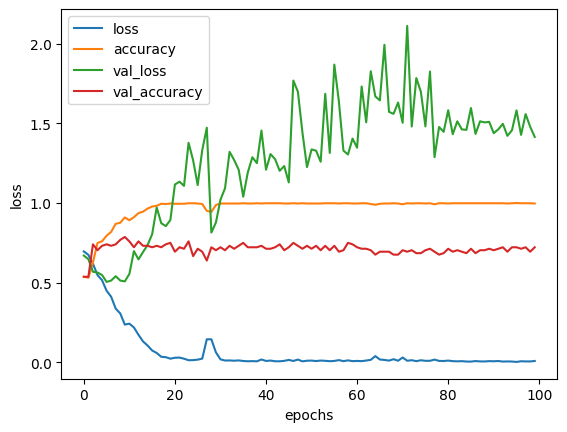

In [ ]:
# Plot history ( also known as a loss  curve or a training curve)
pd.DataFrame( history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
